In [1]:
import sys

import pandas as pd
from IPython.display import clear_output
from random import choice, randint
from prettytable import PrettyTable
from tqdm.notebook import tqdm

from fishs_config import *
from day_forecasting import *

sys.path.append('.')

In [3]:
dt = pd.read_csv(r'..\forecast1.csv', sep=';')
cols = ['day_temp', 'day_pressure', 'day_obl', 'day_phen', 'day_dir', 'day_wind', 'areal', 'city', 'year', 'month', 'day']
fishs_dt = [dt[cols + [fish]] for fish in fishs]
for i in tqdm(range(len(fishs))):
    fish = fishs[i]
    fishs_dt[i]['pressure_forecast'] = pressure_forecast(fish, list(fishs_dt[i]['day_pressure']))
    fishs_dt[i]['pressure_forecast'] = (1 + fishs_dt[i]['pressure_forecast']) / 2
    fishs_dt[i]['temp_forecast'] = temp_forecast(fish, list(fishs_dt[i]['day_temp']), list(fishs_dt[i]['day_obl']), list(fishs_dt[i]['day_phen']))
    fishs_dt[i]['temp_forecast'] = (1 + fishs_dt[i]['temp_forecast']) / 2
    fishs_dt[i]['wind_forecast'] = wind_forecast(fish, list(fishs_dt[i]['day_wind']), list(fishs_dt[i]['day_dir']))
    fishs_dt[i]['wind_forecast'] = (1 + fishs_dt[i]['wind_forecast']) / 2
    moon, moon_dir = gen_moon(len(fishs_dt[i]))
    fishs_dt[i]['moon_forecast'] = moon_forecast(moon, moon_dir)
    fishs_dt[i]['moon_forecast'] = (1 + fishs_dt[i]['moon_forecast']) / 2
    fishs_dt[i]['time_forecast'] = time_forecast(fish, list(fishs_dt[i]['month']), list(fishs_dt[i]['day']))
    fishs_dt[i]['time_forecast'] = fishs_dt[i]['time_forecast'] / fishs_dt[i]['time_forecast'].max()
#     fishs_dt[i]['time_forecast'] = (fishs_dt[i]['time_forecast'] - fishs_dt[i]['time_forecast'].min()) / (fishs_dt[i]['time_forecast'].max() - fishs_dt[i]['time_forecast'].min())
    fishs_dt[i]['forecast'] = fishs_dt[i]['pressure_forecast'] * fish_weights[fish]['pressure']
    fishs_dt[i]['forecast'] += fishs_dt[i]['temp_forecast'] * fish_weights[fish]['temp']
    fishs_dt[i]['forecast'] += fishs_dt[i]['wind_forecast'] * fish_weights[fish]['wind']
    fishs_dt[i]['forecast'] += fishs_dt[i]['moon_forecast'] * fish_weights[fish]['moon']
#     fishs_dt[i]['forecast'] = (fishs_dt[i]['forecast'] - fishs_dt[i]['forecast'].min()) / (fishs_dt[i]['forecast'].max() - fishs_dt[i]['forecast'].min())
#     fishs_dt[i]['forecast'] = fishs_dt[i]['forecast'] * 2.5
    fishs_dt[i]['forecast'] = fishs_dt[i]['time_forecast'] * fishs_dt[i]['forecast']
    fishs_dt[i]['forecast'] = (fishs_dt[i]['forecast'] - fishs_dt[i]['forecast'].min()) / (fishs_dt[i]['forecast'].max() - fishs_dt[i]['forecast'].min())
    fishs_dt[i]['forecast'] = fishs_dt[i]['forecast'] * 1.3
#     fishs_dt[i]['forecast'] = fishs_dt[i]['forecast']  / (fishs_dt[i]['forecast'].max())
#     fishs_dt[i]['forecast'] = fishs_dt[i]['forecast'].apply(lambda x: int(x > 0.5))

C:\Users\Xiaomi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Xiaomi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Xiaomi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [7]:
idx = randint(10, len(fishs_dt[0]))
fishs_dt[8][idx - 10: idx]

,day_temp,day_pressure,day_obl,day_phen,day_dir,day_wind,areal,city,year,month,day,сом,pressure_forecast,temp_forecast,wind_forecast,moon_forecast,time_forecast,forecast
8870,19,737,dull,-,ЮЗ,3,Вологодская область,Вологда,2020,7,22,-1,0.0,0.5,1.0,0.5,1.0,0.560345
8871,16,742,dull,storm,С,3,Вологодская область,Вологда,2020,7,23,-1,0.5,0.0,0.0,0.0,1.0,0.224138
8872,20,747,dull,-,В,1,Вологодская область,Вологда,2020,7,24,-1,0.5,0.5,0.5,0.0,1.0,0.470690
8873,21,752,suncl,-,ЮЗ,3,Вологодская область,Вологда,2020,7,25,-1,0.5,1.0,1.0,0.0,1.0,0.717241
8874,22,754,suncl,-,ЮВ,2,Вологодская область,Вологда,2020,7,26,-1,0.5,1.0,0.5,0.0,1.0,0.582759
8875,24,755,suncl,-,Ю,1,Вологодская область,Вологда,2020,7,27,-1,0.5,1.0,1.0,0.0,1.0,0.717241
8876,26,752,sunc,-,Ю,2,Вологодская область,Вологда,2020,7,28,-1,0.5,1.0,1.0,0.5,1.0,0.896552
8877,23,746,sunc,-,ЮЗ,2,Вологодская область,Вологда,2020,7,29,-1,0.0,1.0,1.0,0.5,1.0,0.672414
8878,20,743,suncl,-,З,3,Вологодская область,Вологда,2020,7,30,-1,0.5,1.0,1.0,0.5,1.0,0.896552
8879,18,740,suncl,storm,Ю,1,Вологодская область,Вологда,2020,7,31,-1,0.5,0.0,1.0,0.5,1.0,0.672414


In [8]:
from sklearn.metrics import mean_absolute_error

for i in range(len(fishs_dt)):
    fish = fishs[i]
    temp_dt = fishs_dt[i][fishs_dt[i][fish] > -1]
    print('Fish: {}, Accuracy: {}'.format(fish, mean_absolute_error(temp_dt[fish], temp_dt['forecast'])))
#     print()

Fish: щука, Accuracy: 0.4007352941176472
Fish: судак, Accuracy: 0.42362492170372684
Fish: окунь, Accuracy: 0.4091936236062239
Fish: берш, Accuracy: 0.4171929178224688
Fish: речная форель, Accuracy: 0.4085584367703085
Fish: озерная форель, Accuracy: 0.3499091300396958
Fish: елец, Accuracy: 0.2574029126213592
Fish: чехонь, Accuracy: 0.2582871012482663
Fish: сом, Accuracy: 0.2407934382323401
Fish: голавль, Accuracy: 0.32986448220064735
Fish: язь, Accuracy: 0.29753109830097085
Fish: карп, Accuracy: 0.22041373183577642
Fish: жерех, Accuracy: 0.27787782301562447
Fish: лещ, Accuracy: 0.39690553243951293
Fish: карась, Accuracy: 0.24996678589678079
Fish: линь, Accuracy: 0.2204368932038835
Fish: пескарь, Accuracy: 0.2838919710278933
Fish: ротан, Accuracy: 0.42067313915857607
Fish: плотва, Accuracy: 0.37353155339805827
Fish: красноперка, Accuracy: 0.37129384459481546
Fish: налим, Accuracy: 0.3356165048543689
Fish: густера, Accuracy: 0.39873092926490983
Fish: амур, Accuracy: 0.21930061129090253
Fi

берш


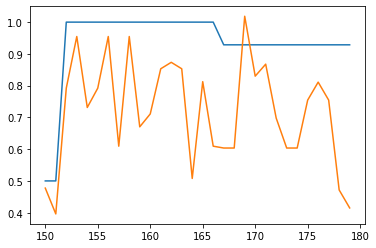

In [10]:
import matplotlib.pyplot as plt
idx = 3
interval = (150, 180)
print(fishs[idx])
fishs_dt[idx]['time_forecast'][interval[0]:interval[1]].plot()
fishs_dt[idx]['forecast'][interval[0]:interval[1]].plot()

In [11]:
cols = ['day_temp', 'day_pressure', 'day_obl', 'day_phen', 'day_dir', 'day_wind', 'areal', 'city', 'year', 'month', 'day', 'forecast']
result_dt = fishs_dt[0][cols]
result_dt = result_dt.rename({'forecast': 'Щука'}, axis=1)
for i in range(1, len(fishs)):
    fish = fishs[i].capitalize()
    result_dt[fish] = fishs_dt[i]['forecast']

In [12]:
result_dt.to_csv(r'..\day_forecasts0.csv', sep=';', index=False)

In [14]:
dt = pd.read_csv(r'..\day_forecasts0.csv', sep=';')
dt

,day_temp,day_pressure,day_obl,day_phen,day_dir,day_wind,areal,city,year,month,...,Красноперка,Налим,Густера,Амур,Ерш,Сазан,Подуст,Толстолобик,Вобла,Хариус
0,-4,749,dull,snow,Ю,3,Алтайский край,Барнаул,2020,1,...,0.256061,0.577778,0.588095,0.0,0.282609,0.040625,0.0,0.0,0.185714,0.094223
1,-1,750,dull,-,Ю,5,Алтайский край,Барнаул,2020,1,...,0.151010,0.317778,0.371429,0.0,0.406250,0.028676,0.0,0.0,0.140693,0.077836
2,-3,749,dull,-,Ю,2,Алтайский край,Барнаул,2020,1,...,0.216667,0.577778,0.464286,0.0,0.441576,0.040625,0.0,0.0,0.225108,0.110609
3,-6,753,dull,-,Ю,1,Алтайский край,Барнаул,2020,1,...,0.177273,0.577778,0.464286,0.0,0.264946,0.032261,0.0,0.0,0.225108,0.110609
4,-2,752,suncl,-,Ю,3,Алтайский край,Барнаул,2020,1,...,0.242929,0.606667,0.402381,0.0,0.635870,0.052574,0.0,0.0,0.270130,0.147479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30516,-6,752,dull,-,З,1,Московская область,Щелково,2020,12,...,0.180556,0.252778,0.417857,0.0,0.317935,0.000000,0.0,0.0,0.225108,0.110609
30517,-6,759,sunc,-,ЮВ,1,Московская область,Щелково,2020,12,...,0.235269,0.265417,0.473571,0.0,0.360326,0.000000,0.0,0.0,0.270130,0.147479
30518,-5,754,dull,-,ЮВ,3,Московская область,Щелково,2020,12,...,0.054714,0.113750,0.083571,0.0,0.678261,0.000000,0.0,0.0,0.123810,0.049160
30519,-3,753,dull,-,-,0,Московская область,Щелково,2020,12,...,0.180556,0.353889,0.306429,0.0,0.720652,0.000000,0.0,0.0,0.225108,0.126996
